In [2]:
import csv
import os
import numpy as np
import pandas as pd
import scipy as sp
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import random

%matplotlib inline

# Preprocessing

In [3]:
columns = ['Station', 'Year', 'Month', 'Day', 'Daily Rainfall Total (mm)',
           'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)',
           'Highest 120 min Rainfall (mm)', 'Mean Temperature (°C)',
           'Maximum Temperature (°C)', 'Minimum Temperature (°C)',
           'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)']  

In [4]:
os.chdir("C:\\Users\\Kelvin\\jupyter nb\\climate analysis")

for folder in os.listdir("data"):
    globals()[folder] = pd.DataFrame()
    
    for file in os.listdir("data/{}".format(folder)):
        with open("C:\\Users\\Kelvin\\jupyter nb\\climate analysis\\data\\{}\\{}".format(folder, file)) as file_:
            csv_reader = csv.reader(file_, delimiter=",")
            temp = pd.DataFrame([_ for _ in csv_reader])
            
            temp.drop(0, axis=0, inplace=True)
            temp.columns = columns
            
            globals()[folder] = globals()[folder].append(temp)
            

### Convert numerical string to float

In [5]:
numeric_features = ['Year', 'Month', 'Day', 'Daily Rainfall Total (mm)',
                    'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)',
                    'Highest 120 min Rainfall (mm)', 'Mean Temperature (°C)',
                    'Maximum Temperature (°C)', 'Minimum Temperature (°C)',
                    'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)']  

changi["Date"] = changi[['Year', 'Month', 'Day']].agg('-'.join, axis=1)
changi = changi.reset_index().drop("index", axis=1)
changi.replace(['—', '-'] , np.nan, inplace=True)
changi[numeric_features] = changi[numeric_features].apply(pd.to_numeric)


### Fill in missing values

In [6]:
changi.head()

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Date
0,Changi,2014,1,1,0.0,0.0,0.0,0.0,26.7,29.0,24.9,10.0,29.9,2014-1-1
1,Changi,2014,1,2,0.0,0.0,0.0,0.0,27.4,30.9,25.0,11.9,36.0,2014-1-2
2,Changi,2014,1,3,0.0,0.0,0.0,0.0,27.1,30.4,24.9,9.7,33.1,2014-1-3
3,Changi,2014,1,4,0.0,0.0,0.0,0.0,27.1,31.1,24.9,6.4,25.9,2014-1-4
4,Changi,2014,1,5,18.4,8.6,10.8,15.4,24.8,26.4,23.3,6.8,25.6,2014-1-5


In [121]:
changi.isnull().sum()

Station                          0
Year                             0
Month                            0
Day                              0
Daily Rainfall Total (mm)        0
Highest 30 min Rainfall (mm)     0
Highest 60 min Rainfall (mm)     0
Highest 120 min Rainfall (mm)    0
Mean Temperature (°C)            0
Maximum Temperature (°C)         0
Minimum Temperature (°C)         0
Mean Wind Speed (km/h)           0
Max Wind Speed (km/h)            0
Date                             0
Week                             0
Wind*temp                        0
Wind/temp                        0
Circle                           0
Circle2                          0
Circle1                          0
Circle3                          0
wind*temp                        0
dtype: int64

In [120]:
changi["Mean Wind Speed (km/h)"].fillna(changi["Mean Wind Speed (km/h)"]
                                        .median(), inplace=True)
changi["Max Wind Speed (km/h)"].fillna(changi["Max Wind Speed (km/h)"]
                                        .median(), inplace=True)

changi["Highest 30 min Rainfall (mm)"].fillna(changi["Highest 30 min Rainfall (mm)"]
                                        .median(), inplace=True)
changi["Highest 60 min Rainfall (mm)"].fillna(changi["Highest 60 min Rainfall (mm)"]
                                        .median(), inplace=True)
changi["Highest 120 min Rainfall (mm)"].fillna(changi["Highest 120 min Rainfall (mm)"]
                                        .median(), inplace=True)


## Data visualisation

In [9]:
sns.set_palette("ocean")

In [10]:
sample = changi.sample(500)
sample.head()

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Date
1078,Changi,2016,12,14,0.2,0.2,0.2,0.2,28.0,33.6,25.0,6.1,28.8,2016-12-14
2161,Changi,2019,12,2,59.6,27.4,47.2,56.8,26.7,31.2,23.9,6.8,28.4,2019-12-2
929,Changi,2016,7,18,44.0,20.2,31.0,42.4,27.3,32.5,24.8,5.4,23.8,2016-7-18
2162,Changi,2019,12,3,0.0,0.0,0.0,0.0,27.8,30.3,25.7,13.3,35.6,2019-12-3
1736,Changi,2018,10,3,0.0,0.0,0.0,0.0,29.7,32.6,27.3,9.4,33.1,2018-10-3


#### Correlation between features

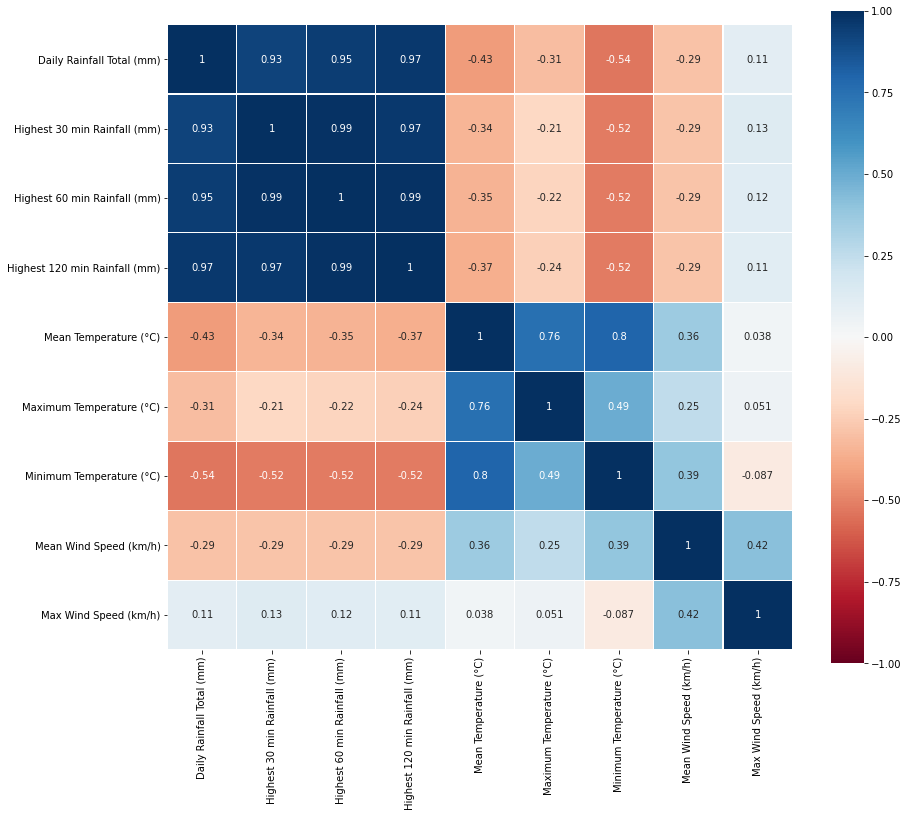

In [11]:
idx = pd.IndexSlice

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(changi.loc[idx[:], idx["Daily Rainfall Total (mm)":"Date"]].corr(), 
            ax=ax, square=True, cmap="RdBu", linecolor="white", 
            linewidths=0.1, vmin=-1, annot=True);

In [243]:
sns.set_palette("ocean")

#### Rainfall, Mean Wind Speed, and Temperature

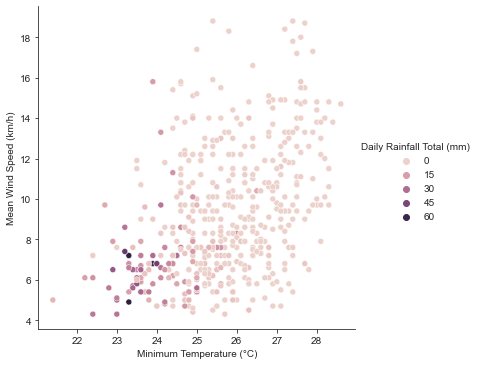

In [127]:
sns.relplot(data=sample, y="Mean Wind Speed (km/h)", 
            x="Minimum Temperature (°C)", hue="Daily Rainfall Total (mm)");

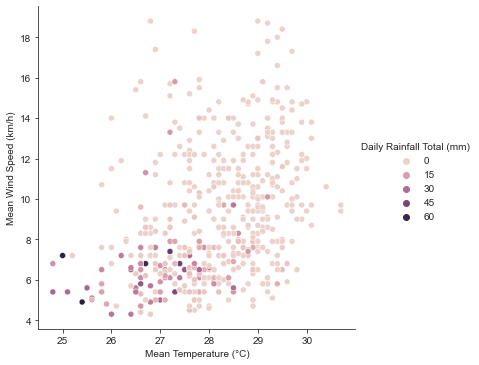

In [128]:
sns.relplot(data=sample, y="Mean Wind Speed (km/h)", 
            x="Mean Temperature (°C)", hue="Daily Rainfall Total (mm)");

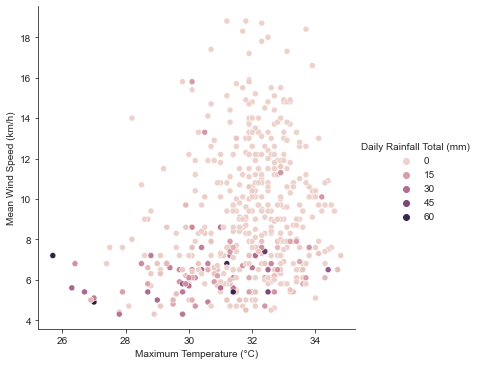

In [129]:
sns.relplot(data=sample, y="Mean Wind Speed (km/h)", 
            x="Maximum Temperature (°C)", hue="Daily Rainfall Total (mm)");

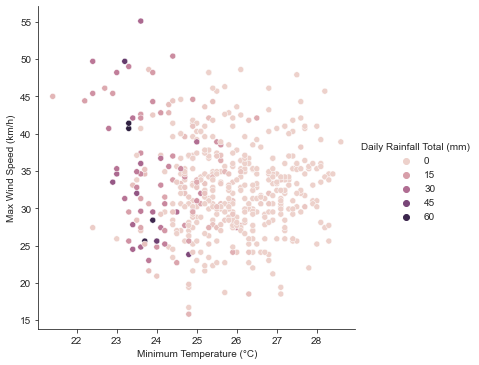

In [199]:
sns.relplot(data=sample, y="Max Wind Speed (km/h)", 
            x="Minimum Temperature (°C)", hue="Daily Rainfall Total (mm)");

#### Changes in temperature, rainfall and wind to time

In [131]:
changi["Week"] = (30*(changi["Month"]-1) + changi["Day"]) // 7 + 1
changi.head()

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),...,Week,Wind*temp,Wind/temp,Circle,Circle2,Circle1,Circle3,wind*temp,Wind*Temp,Wind/Temp
0,Changi,2014,1,1,0.0,0.0,0.0,0.0,26.7,29.0,...,1,249.00,0.401606,720.01,812.89,16438.249,941.00,6200.100,6200.100,0.401606
1,Changi,2014,1,2,0.0,0.0,0.0,0.0,27.4,30.9,...,1,297.50,0.476000,766.61,892.37,17310.159,1096.42,7437.500,7437.500,0.476000
2,Changi,2014,1,3,0.0,0.0,0.0,0.0,27.1,30.4,...,1,241.53,0.389558,714.10,828.50,16350.922,1018.25,6014.097,6014.097,0.389558
3,Changi,2014,1,4,0.0,0.0,0.0,0.0,27.1,31.1,...,1,159.36,0.257028,660.97,775.37,15700.393,1008.17,3968.064,3968.064,0.257028
4,Changi,2014,1,5,18.4,8.6,10.8,15.4,24.8,26.4,...,1,158.44,0.291845,589.13,661.28,12963.769,743.20,3691.652,3691.652,0.291845


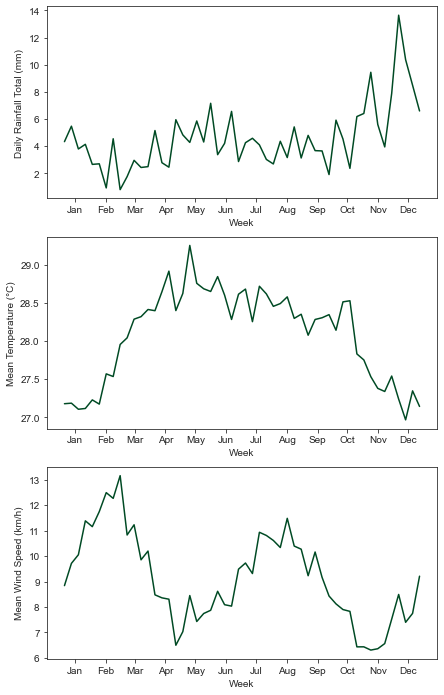

In [192]:
fig, ax = plt.subplots(3, figsize=(7, 12))

for axis in ax.flatten():
    axis.set_xticks((np.cumsum([0, 31, 29, 31, 30, 31, 30, 31,
                          31, 30, 31, 30])/7) + 2.5)
    axis.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                           "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])


rain = pd.DataFrame(changi.groupby("Week", as_index=False)
                    ["Daily Rainfall Total (mm)"].mean())
sns.lineplot(ax=ax[0], data=rain, x="Week", y="Daily Rainfall Total (mm)");
    
temp = pd.DataFrame(changi.groupby("Week", as_index=False)
                    ["Mean Temperature (°C)"].mean())
sns.lineplot(ax=ax[1], data=temp, x="Week", y="Mean Temperature (°C)");

wind = pd.DataFrame(changi.groupby("Week", as_index=False)
                    ["Mean Wind Speed (km/h)"].mean())
sns.lineplot(ax=ax[2], data=wind, x="Week", y="Mean Wind Speed (km/h)");


## Feature Engineering

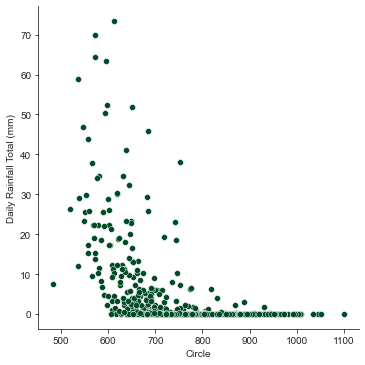

In [188]:
changi["Circle"] = changi["Mean Wind Speed (km/h)"]**2 + changi["Minimum Temperature (°C)"]**2
sns.relplot(data=changi.sample(500), x="Circle", y="Daily Rainfall Total (mm)");

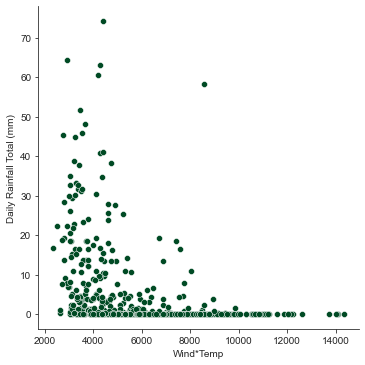

In [193]:
changi["Wind*Temp"] = changi["Mean Wind Speed (km/h)"] * changi["Minimum Temperature (°C)"]**2
sns.relplot(data=changi.sample(500), x="Wind*Temp", y="Daily Rainfall Total (mm)");

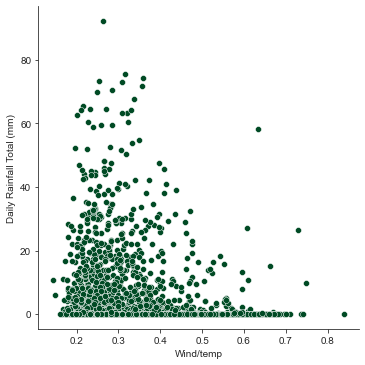

In [137]:
changi["Wind/Temp"] = changi["Mean Wind Speed (km/h)"] / changi["Minimum Temperature (°C)"]
sns.relplot(data=changi, x="Wind/temp", y="Daily Rainfall Total (mm)");

## Model

In [488]:
X = changi[['Week', 'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)', "Max Wind Speed (km/h)", 'Circle', "Wind/Temp", "Wind*Temp"]]  
y = changi["Daily Rainfall Total (mm)"]

In [489]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, normalize
from sklearn.pipeline import make_pipeline

scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))

X = pd.DataFrame(normalize(X, axis=0))
X.columns = ['Week', 'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)', 
             "Max Wind Speed (km/h)", 'Circle', "Wind/Temp", "Wind*Temp"]

X

,Week,Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Circle,Wind/Temp,Wind*Temp
0,0.000000,0.016199,0.020056,0.015501,0.016409,0.021208,0.017591
1,0.000000,0.016625,0.025918,0.021890,0.019635,0.027319,0.022879
2,0.000000,0.016199,0.019130,0.018853,0.016000,0.020218,0.016796
3,0.000000,0.016199,0.008948,0.011312,0.012322,0.009331,0.008052
4,0.000000,0.009378,0.010182,0.010997,0.007349,0.012191,0.006871
...,...,...,...,...,...,...,...
2552,0.034188,0.012789,0.018205,0.013302,0.012890,0.020258,0.014427
2553,0.034188,0.020888,0.027770,0.021052,0.024179,0.027711,0.027206
2554,0.034188,0.016199,0.007714,0.011312,0.011979,0.008011,0.006993
2555,0.034188,0.017051,0.020364,0.019062,0.017241,0.021272,0.018288


In [490]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

In [491]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(lin_reg.score(X_test, y_test), lin_reg.score(X_train, y_train))

0.39166607937204356

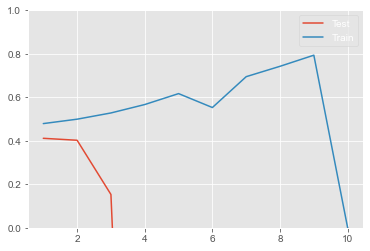

In [567]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))

train_scores = np.zeros(50)
test_scores = np.zeros(50)
for i, n in enumerate(np.arange(1, 11)):
    model = PolynomialRegression(degree=int(n))
    model.fit(X_train, y_train)
    train_scores[i] = model.score(X_train, y_train)
    test_scores[i] = model.score(X_test, y_test)        


fig, ax = plt.subplots()

ax.plot(np.arange(1, 11), test_scores[1:11], label="Test")
ax.plot(np.arange(1, 11), train_scores[1:11], label="Train")
ax.set(ylim=(0, 1))
ax.legend();

In [569]:
poly_reg = PolynomialRegression(degree=2)
poly_reg.fit(X_train, y_train)
print(poly_reg.score(X_test, y_test), poly_reg.score(X_train, y_train))

0.41158999064475044 0.4792463584240968


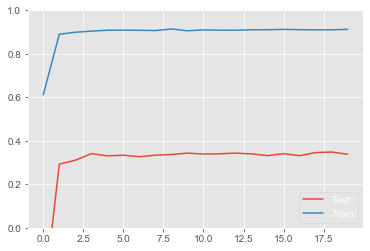

In [522]:
from sklearn.ensemble import RandomForestRegressor

train_scores = np.zeros(50)
test_scores = np.zeros(50)
for i, n in enumerate(np.linspace(1, 300, 20)):
    model = RandomForestRegressor(n_estimators=int(n))
    model.fit(X_train, y_train)
    train_scores[i] = model.score(X_train, y_train)
    test_scores[i] = model.score(X_test, y_test)        


fig, ax = plt.subplots()

ax.plot(np.arange(20), test_scores[:20], label="Test")
ax.plot(np.arange(20), train_scores[:20], label="Train")
ax.set(ylim=(0, 1))
ax.legend();

In [566]:
rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(X_train, y_train)
print(rfr.score(X_test, y_test), rfr.score(X_train, y_train))

0.34481864371554793 0.9118262324146202


In [510]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(X_train, y_train)
print(br.score(X_test, y_test), br.score(X_train, y_train))

0.39081966935605994 0.4155859837585588


In [556]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.3203150968817813 0.36789822823986273


In [512]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(X_train, y_train)
print(sgd.score(X_test, y_test), sgd.score(X_train, y_train))

0.3395415810008774 0.38376401636969126


In [541]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
print(svr.score(X_test, y_test), svr.score(X_train, y_train))

0.3339672485345422 0.36501522691730126


In [527]:
from sklearn.neural_network import MLPRegressor 
scores = np.zeros(11)
for i, j in enumerate(np.arange(1, 202, 20)):
    mlp = MLPRegressor(hidden_layer_sizes=j)
    mlp.fit(X_train, y_train)
    scores[i] = mlp.score(X_test, y_test)
for i, s in enumerate(scores):
    print(1 + 20*i, s)

c:\users\kelvin\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\kelvin\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\kelvin\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\kelvin\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

1 -0.016678510042780426
21 0.4039777701798559
41 0.408062179798109
61 0.42232145337254023
81 0.42109227882730826
101 0.4260315645872157
121 0.42492804986000465
141 0.4262442096248965
161 0.4242652837957832
181 0.42553389159179045
201 0.425091110808842


c:\users\kelvin\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [530]:
mlp = MLPRegressor(hidden_layer_sizes=100)
mlp.fit(X_train, y_train)
print(mlp.score(X_test, y_test), mlp.score(X_train, y_train))

0.42288692020651375 0.4697637170776622


c:\users\kelvin\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


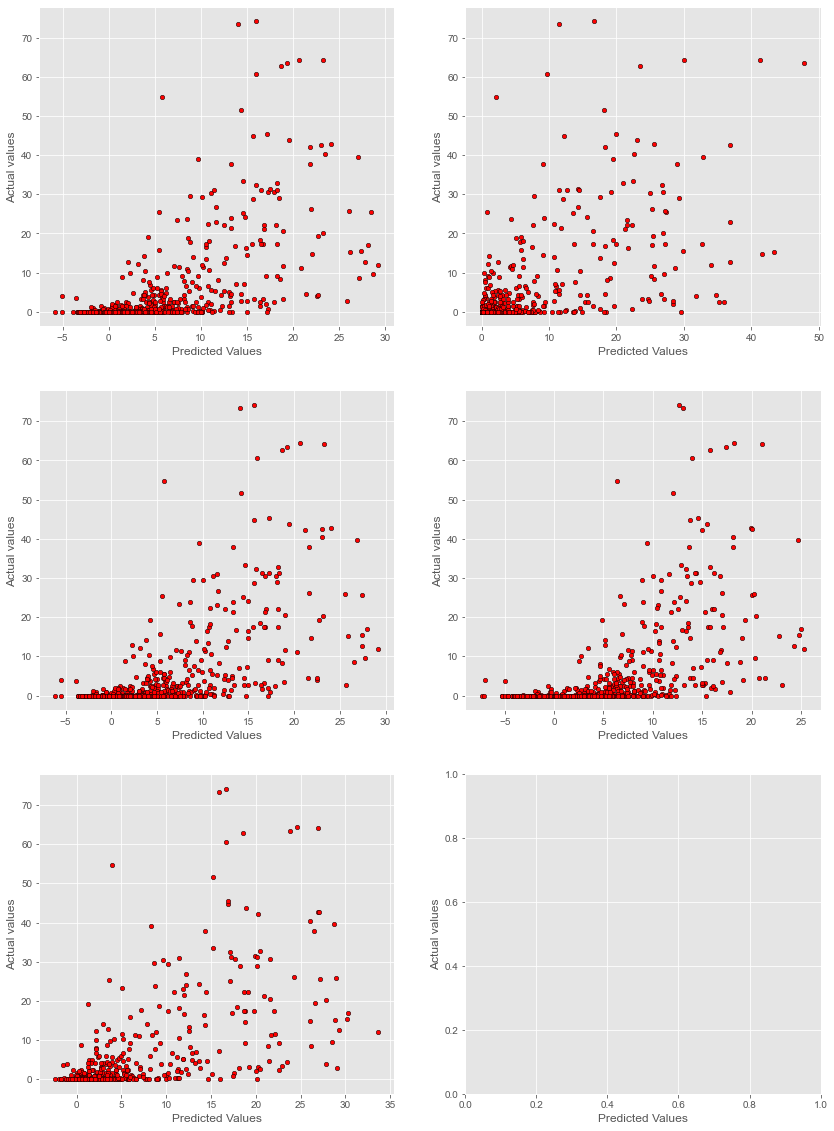

In [532]:
fig, ax = plt.subplots(3, 2, figsize=(14, 20))
plt.style.use('ggplot')

for axes in ax.flatten():
    axes.set_ylabel('Actual values')
    axes.set_xlabel('Predicted Values')

    
    
ax[0, 0].scatter(lin_reg.predict(X_test), y_test, c='red', s=20, edgecolors="k")
ax[0, 1].scatter(rfr.predict(X_test), y_test, c='red', s=20, edgecolors="k")
ax[1, 0].scatter(br.predict(X_test), y_test, c='red', s=20, edgecolors="k")
ax[1, 1].scatter(sgd.predict(X_test), y_test, c='red', s=20, edgecolors="k")
ax[2, 0].scatter(mlp.predict(X_test), y_test, c='red', s=20, edgecolors="k")
# ax[2, 1].scatter(sgd.predict(X_test), y_test, c='red', s=20, edgecolors="k");
